<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/Farah_ADS1_Assignment_Statistics_and_Trends_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

Loading datasets...
Creating relational dataset...
Created relation dataset with 13 years of data

Relational Dataset:
 Year  Residents_65Plus  NursingHomeBeds  BedsPer1000Residents  CoverageRatio  Residents_Growth_Pct  Beds_Growth_Pct
 2010            340700             9551                 28.03         0.0280                   NaN              NaN
 2011            370300             9690                 26.17         0.0262                  8.69             1.46
 2012            389800             9721                 24.94         0.0249                  5.27             0.32
 2013            413100            10838                 26.24         0.0262                  5.98            11.49
 2014            466300            10968                 23.52         0.0235                 12.88             1.20
 2015            460900            12185                 26.44         0.0264                 -1.16            11.10
 2016            492700            13022                 26.43

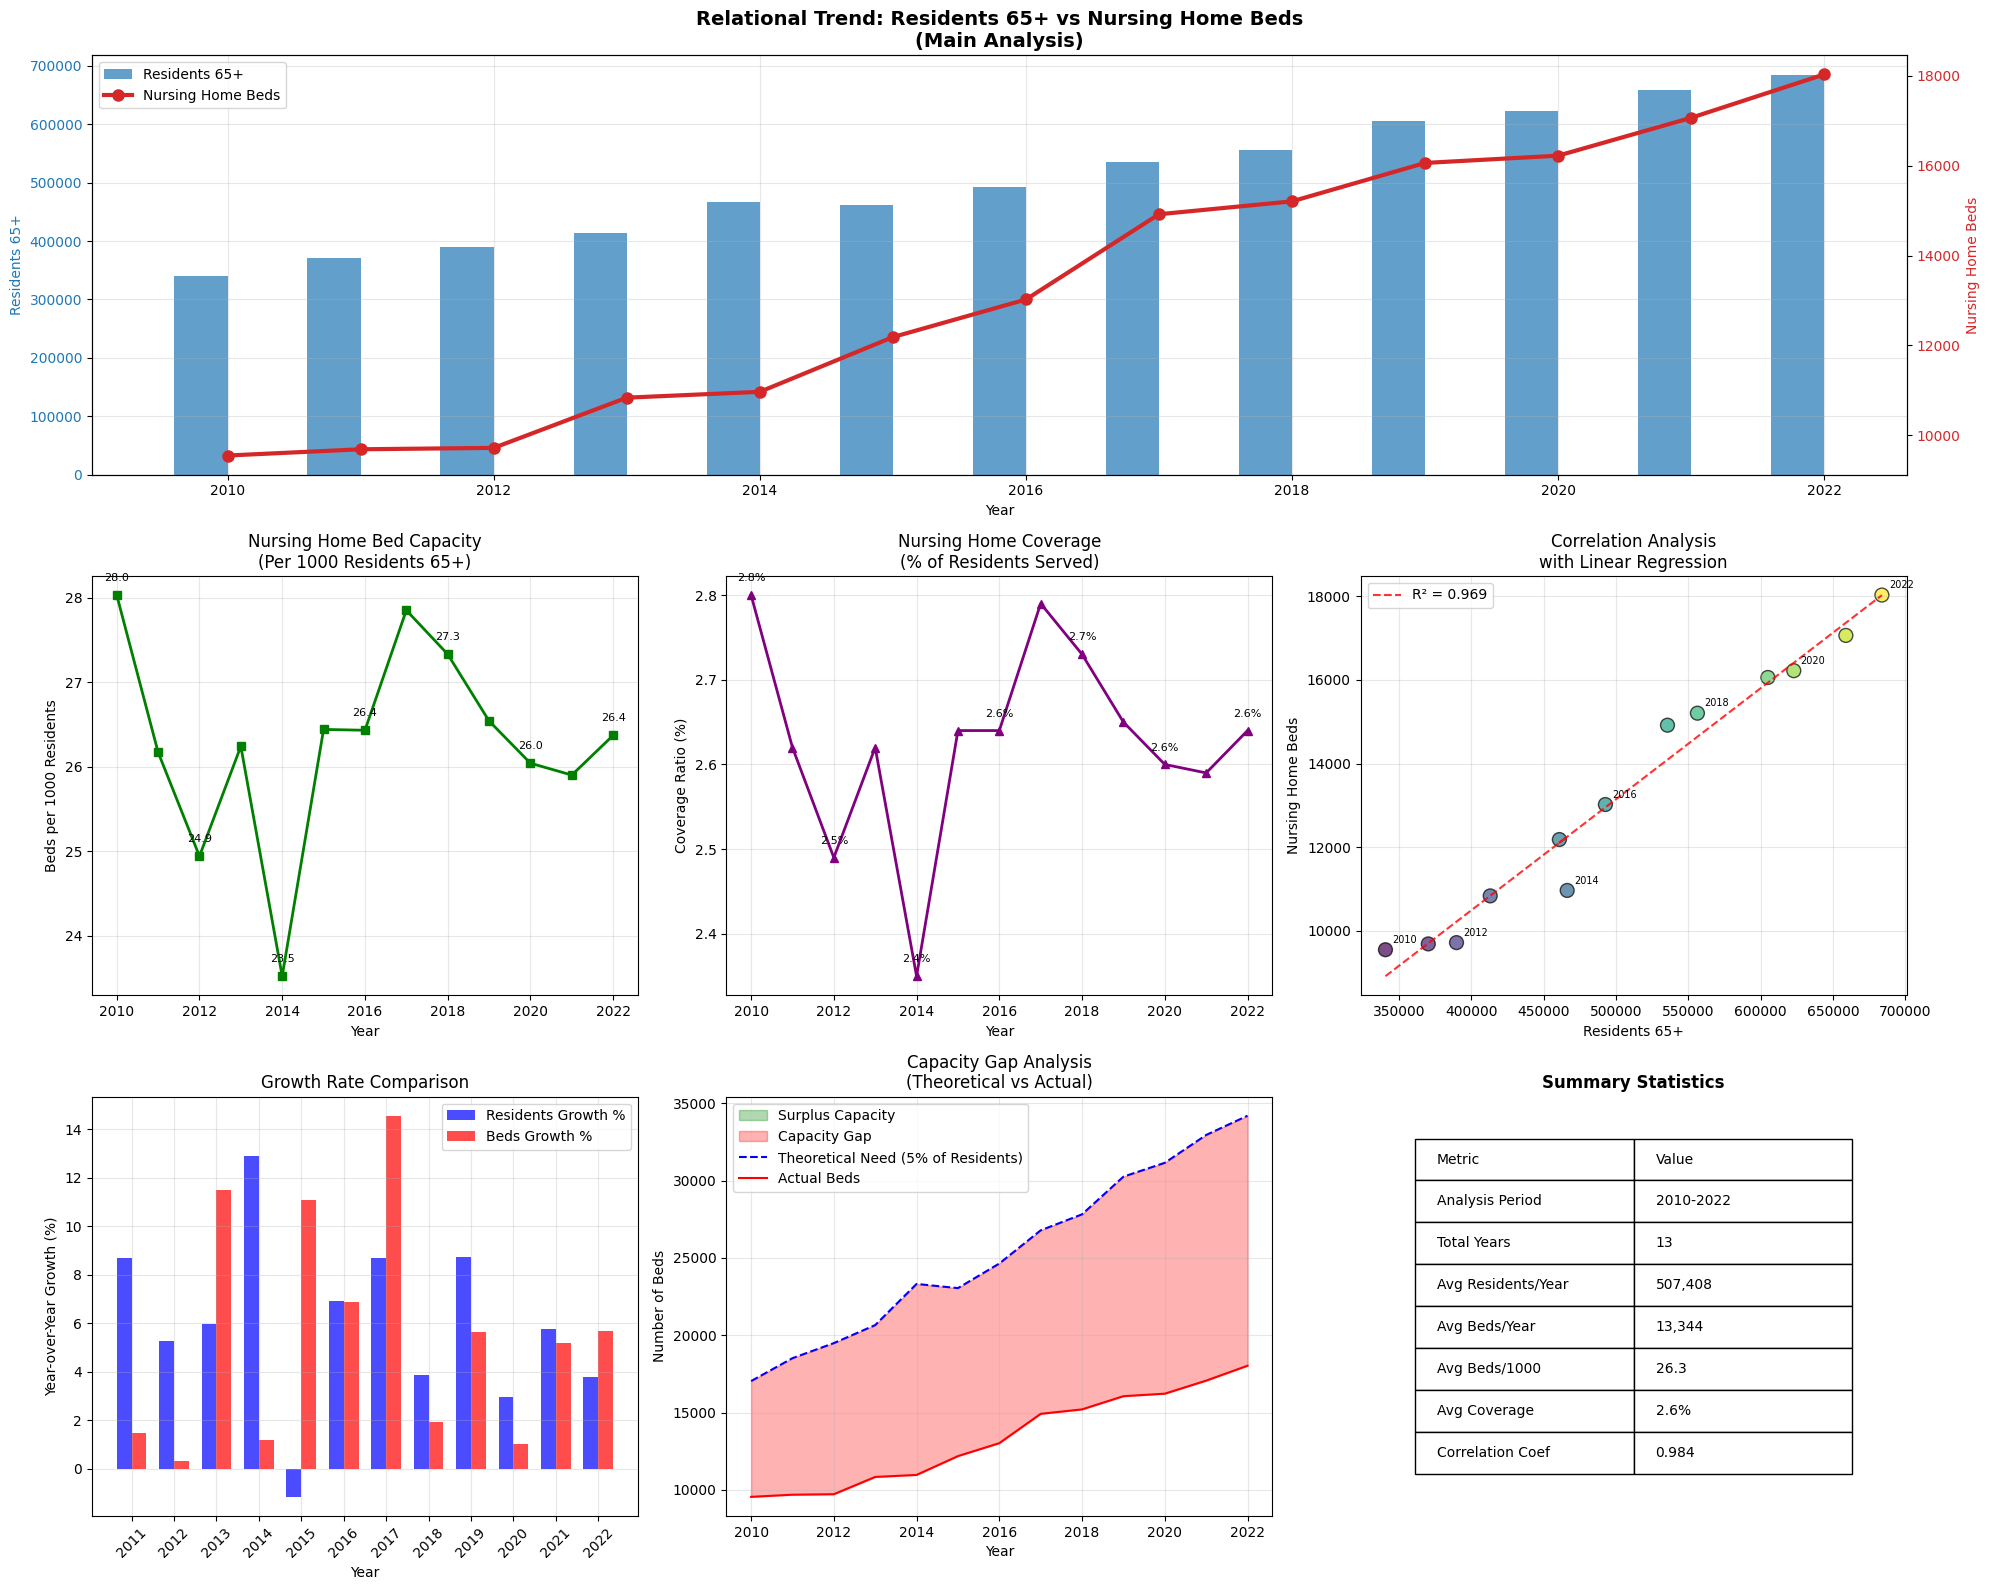


DETAILED CORRELATION ANALYSIS
Correlation Coefficient: 0.9844
R-squared Value: 0.9691
Linear Regression: Beds = 0.0265 * Residents + -125
P-value: 0.000000
Standard Error: 0.0014

Interpretation: STRONG POSITIVE correlation
As the elderly population grows, nursing home bed capacity shows a strong relationship.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

class ElderlyHealthcareRelationAnalyzer:
    def __init__(self):
        self.residents_data = None
        self.nursing_home_data = None
        self.relation_data = None

    def load_residents_data(self, file_path):
        """
        Load and preprocess the residents 65+ data
        """
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Clean column names and data
        df.columns = [col.strip() for col in df.columns]

        # Filter for total residents data (excluding breakdowns)
        total_residents = df[df['DataSeries'] == 'Total'].copy()

        # Melt to long format
        residents_long = total_residents.melt(
            id_vars=['DataSeries'],
            var_name='Year',
            value_name='Residents_65Plus'
        )

        residents_long['Year'] = residents_long['Year'].astype(int)
        residents_long = residents_long.drop('DataSeries', axis=1)

        self.residents_data = residents_long
        print(f"Loaded residents data for years: {list(residents_long['Year'].unique())}")
        return residents_long

    def load_nursing_home_data(self, file_path):
        """
        Load and preprocess nursing home beds data
        """
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Clean the data - remove empty rows and select relevant columns
        df_clean = df[df['year'].notna()].copy()
        df_clean = df_clean[df_clean['institution_type'] == 'Residential Long-Term'].copy()

        # Select and rename columns
        nursing_home_data = df_clean[['year', 'No_Beds']].copy()
        nursing_home_data.columns = ['Year', 'NursingHomeBeds']
        nursing_home_data['Year'] = nursing_home_data['Year'].astype(int)

        self.nursing_home_data = nursing_home_data
        print(f"Loaded nursing home data for years: {list(nursing_home_data['Year'].unique())}")
        return nursing_home_data

    def create_relation_dataset(self):
        """
        Combine residents and nursing home data to create relational dataset
        """
        if self.residents_data is not None and self.nursing_home_data is not None:
            # Merge datasets on Year
            self.relation_data = pd.merge(
                self.residents_data,
                self.nursing_home_data,
                on='Year',
                how='inner'
            )

            # Calculate additional metrics
            self.relation_data['BedsPer1000Residents'] = (
                self.relation_data['NursingHomeBeds'] /
                self.relation_data['Residents_65Plus'] * 1000
            ).round(2)

            self.relation_data['CoverageRatio'] = (
                self.relation_data['NursingHomeBeds'] /
                self.relation_data['Residents_65Plus']
            ).round(4)

            # Calculate year-over-year growth rates
            self.relation_data['Residents_Growth_Pct'] = (
                self.relation_data['Residents_65Plus'].pct_change() * 100
            ).round(2)

            self.relation_data['Beds_Growth_Pct'] = (
                self.relation_data['NursingHomeBeds'].pct_change() * 100
            ).round(2)

            print(f"Created relation dataset with {len(self.relation_data)} years of data")
            return self.relation_data
        else:
            print("Please load both datasets first")
            return None

    def plot_comprehensive_relation_analysis(self):
        """
        Create comprehensive relational graphs and analysis
        """
        if self.relation_data is None:
            print("No relation data available. Please create relation dataset first.")
            return

        # Create figure with subplots
        fig = plt.figure(figsize=(20, 16))

        # Define the grid layout
        gs = plt.GridSpec(3, 3, figure=fig)

        # Plot 1: Dual-axis trend (main relational graph)
        ax1 = fig.add_subplot(gs[0, :])
        self._plot_dual_axis_trend(ax1)

        # Plot 2: Beds per 1000 residents
        ax2 = fig.add_subplot(gs[1, 0])
        self._plot_beds_per_capita(ax2)

        # Plot 3: Coverage ratio
        ax3 = fig.add_subplot(gs[1, 1])
        self._plot_coverage_ratio(ax3)

        # Plot 4: Scatter plot with regression
        ax4 = fig.add_subplot(gs[1, 2])
        self._plot_scatter_with_regression(ax4)

        # Plot 5: Growth rates comparison
        ax5 = fig.add_subplot(gs[2, 0])
        self._plot_growth_rates(ax5)

        # Plot 6: Facility capacity analysis
        ax6 = fig.add_subplot(gs[2, 1])
        self._plot_capacity_analysis(ax6)

        # Plot 7: Summary statistics
        ax7 = fig.add_subplot(gs[2, 2])
        self._plot_summary_table(ax7)

        plt.tight_layout()
        plt.show()

        # Additional correlation analysis
        self._print_correlation_analysis()

    def _plot_dual_axis_trend(self, ax):
        """Plot dual-axis trend of residents vs nursing home beds"""
        # Primary axis - Residents
        color1 = 'tab:blue'
        bars = ax.bar(self.relation_data['Year'] - 0.2,
                     self.relation_data['Residents_65Plus'],
                     width=0.4, alpha=0.7, color=color1, label='Residents 65+')
        ax.set_xlabel('Year')
        ax.set_ylabel('Residents 65+', color=color1)
        ax.tick_params(axis='y', labelcolor=color1)

        # Secondary axis - Nursing Home Beds
        ax2 = ax.twinx()
        color2 = 'tab:red'
        line = ax2.plot(self.relation_data['Year'],
                       self.relation_data['NursingHomeBeds'],
                       color=color2, marker='o', linewidth=3,
                       markersize=8, label='Nursing Home Beds')
        ax2.set_ylabel('Nursing Home Beds', color=color2)
        ax2.tick_params(axis='y', labelcolor=color2)

        ax.set_title('Relational Trend: Residents 65+ vs Nursing Home Beds\n(Main Analysis)',
                    fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)

        # Combine legends
        lines1, labels1 = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    def _plot_beds_per_capita(self, ax):
        """Plot beds per 1000 residents"""
        ax.plot(self.relation_data['Year'],
               self.relation_data['BedsPer1000Residents'],
               marker='s', color='green', linewidth=2, markersize=6)
        ax.set_xlabel('Year')
        ax.set_ylabel('Beds per 1000 Residents')
        ax.set_title('Nursing Home Bed Capacity\n(Per 1000 Residents 65+)')
        ax.grid(True, alpha=0.3)

        # Add value annotations
        for i, (year, value) in enumerate(zip(self.relation_data['Year'],
                                            self.relation_data['BedsPer1000Residents'])):
            if i % 2 == 0:  # Show every other year to avoid clutter
                ax.annotate(f'{value:.1f}', (year, value),
                           textcoords="offset points", xytext=(0,10),
                           ha='center', fontsize=8)

    def _plot_coverage_ratio(self, ax):
        """Plot coverage ratio over time"""
        coverage_pct = self.relation_data['CoverageRatio'] * 100
        ax.plot(self.relation_data['Year'], coverage_pct,
               marker='^', color='purple', linewidth=2, markersize=6)
        ax.set_xlabel('Year')
        ax.set_ylabel('Coverage Ratio (%)')
        ax.set_title('Nursing Home Coverage\n(% of Residents Served)')
        ax.grid(True, alpha=0.3)

        # Add value annotations
        for i, (year, value) in enumerate(zip(self.relation_data['Year'], coverage_pct)):
            if i % 2 == 0:
                ax.annotate(f'{value:.1f}%', (year, value),
                           textcoords="offset points", xytext=(0,10),
                           ha='center', fontsize=8)

    def _plot_scatter_with_regression(self, ax):
        """Plot scatter plot with regression line"""
        residents = self.relation_data['Residents_65Plus']
        beds = self.relation_data['NursingHomeBeds']
        years = self.relation_data['Year']

        scatter = ax.scatter(residents, beds, c=years, cmap='viridis',
                           s=100, alpha=0.7, edgecolors='black')

        # Calculate and plot regression line
        slope, intercept, r_value, p_value, std_err = linregress(residents, beds)
        regression_line = slope * residents + intercept

        ax.plot(residents, regression_line, 'r--', alpha=0.8,
               label=f'R² = {r_value**2:.3f}')

        ax.set_xlabel('Residents 65+')
        ax.set_ylabel('Nursing Home Beds')
        ax.set_title('Correlation Analysis\nwith Linear Regression')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Add year labels to some points
        for i, year in enumerate(years):
            if year % 2 == 0:  # Label even years
                ax.annotate(str(year), (residents.iloc[i], beds.iloc[i]),
                           textcoords="offset points", xytext=(5,5),
                           ha='left', fontsize=7)

    def _plot_growth_rates(self, ax):
        """Plot year-over-year growth rates"""
        years = self.relation_data['Year'][1:]  # Skip first year (no growth data)
        residents_growth = self.relation_data['Residents_Growth_Pct'][1:]
        beds_growth = self.relation_data['Beds_Growth_Pct'][1:]

        width = 0.35
        x = np.arange(len(years))

        ax.bar(x - width/2, residents_growth, width, label='Residents Growth %',
              alpha=0.7, color='blue')
        ax.bar(x + width/2, beds_growth, width, label='Beds Growth %',
              alpha=0.7, color='red')

        ax.set_xlabel('Year')
        ax.set_ylabel('Year-over-Year Growth (%)')
        ax.set_title('Growth Rate Comparison')
        ax.set_xticks(x)
        ax.set_xticklabels(years, rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_capacity_analysis(self, ax):
        """Plot capacity gap analysis"""
        theoretical_need = self.relation_data['Residents_65Plus'] * 0.05  # Assume 5% need
        actual_beds = self.relation_data['NursingHomeBeds']
        years = self.relation_data['Year']

        ax.fill_between(years, theoretical_need, actual_beds,
                       where=(actual_beds >= theoretical_need),
                       alpha=0.3, color='green', label='Surplus Capacity')
        ax.fill_between(years, theoretical_need, actual_beds,
                       where=(actual_beds < theoretical_need),
                       alpha=0.3, color='red', label='Capacity Gap')

        ax.plot(years, theoretical_need, 'b--', label='Theoretical Need (5% of Residents)')
        ax.plot(years, actual_beds, 'r-', label='Actual Beds')

        ax.set_xlabel('Year')
        ax.set_ylabel('Number of Beds')
        ax.set_title('Capacity Gap Analysis\n(Theoretical vs Actual)')
        ax.legend()
        ax.grid(True, alpha=0.3)

    def _plot_summary_table(self, ax):
        """Plot summary statistics table"""
        ax.axis('off')

        # Calculate summary statistics
        summary_data = [
            ['Metric', 'Value'],
            ['Analysis Period', f"{self.relation_data['Year'].min()}-{self.relation_data['Year'].max()}"],
            ['Total Years', len(self.relation_data)],
            ['Avg Residents/Year', f"{self.relation_data['Residents_65Plus'].mean():,.0f}"],
            ['Avg Beds/Year', f"{self.relation_data['NursingHomeBeds'].mean():,.0f}"],
            ['Avg Beds/1000', f"{self.relation_data['BedsPer1000Residents'].mean():.1f}"],
            ['Avg Coverage', f"{self.relation_data['CoverageRatio'].mean()*100:.1f}%"],
            ['Correlation Coef', f"{self.relation_data['Residents_65Plus'].corr(self.relation_data['NursingHomeBeds']):.3f}"]
        ]

        table = ax.table(cellText=summary_data,
                        cellLoc='left',
                        loc='center',
                        bbox=[0.1, 0.1, 0.8, 0.8])
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)

        ax.set_title('Summary Statistics', fontweight='bold')

    def _print_correlation_analysis(self):
        """Print detailed correlation analysis"""
        correlation = self.relation_data['Residents_65Plus'].corr(
            self.relation_data['NursingHomeBeds']
        )

        # Linear regression
        slope, intercept, r_value, p_value, std_err = linregress(
            self.relation_data['Residents_65Plus'],
            self.relation_data['NursingHomeBeds']
        )

        print("\n" + "="*70)
        print("DETAILED CORRELATION ANALYSIS")
        print("="*70)
        print(f"Correlation Coefficient: {correlation:.4f}")
        print(f"R-squared Value: {r_value**2:.4f}")
        print(f"Linear Regression: Beds = {slope:.4f} * Residents + {intercept:.0f}")
        print(f"P-value: {p_value:.6f}")
        print(f"Standard Error: {std_err:.4f}")

        # Interpretation
        if correlation > 0.8:
            strength = "STRONG POSITIVE"
        elif correlation > 0.5:
            strength = "MODERATE POSITIVE"
        elif correlation > 0.3:
            strength = "WEAK POSITIVE"
        else:
            strength = "VERY WEAK OR NO"

        print(f"\nInterpretation: {strength} correlation")
        print("As the elderly population grows, nursing home bed capacity shows a " +
              f"{'strong' if correlation > 0.7 else 'moderate' if correlation > 0.5 else 'weak'} relationship.")
        print("="*70)

    def generate_detailed_report(self):
        """
        Generate a comprehensive analysis report
        """
        if self.relation_data is None:
            print("No data available for report generation.")
            return

        latest_year = self.relation_data['Year'].max()
        latest_data = self.relation_data[self.relation_data['Year'] == latest_year].iloc[0]

        print("\n" + "="*80)
        print("COMPREHENSIVE RELATIONAL ANALYSIS REPORT")
        print("RESIDENTS 65+ vs NURSING HOME BEDS")
        print("="*80)

        print(f"\nTIMEFRAME: {self.relation_data['Year'].min()} - {latest_year}")
        print(f"DATA POINTS: {len(self.relation_data)} years")

        print(f"\nKEY METRICS ({latest_year}):")
        print(f"  • Residents 65+: {latest_data['Residents_65Plus']:,}")
        print(f"  • Nursing Home Beds: {latest_data['NursingHomeBeds']:,}")
        print(f"  • Beds per 1000 Residents: {latest_data['BedsPer1000Residents']:.1f}")
        print(f"  • Coverage Ratio: {latest_data['CoverageRatio']*100:.2f}%")

        print(f"\nTREND ANALYSIS:")
        residents_growth = ((latest_data['Residents_65Plus'] /
                           self.relation_data['Residents_65Plus'].iloc[0]) - 1) * 100
        beds_growth = ((latest_data['NursingHomeBeds'] /
                       self.relation_data['NursingHomeBeds'].iloc[0]) - 1) * 100

        print(f"  • Residents Growth ({self.relation_data['Year'].min()}-{latest_year}): {residents_growth:.1f}%")
        print(f"  • Beds Growth ({self.relation_data['Year'].min()}-{latest_year}): {beds_growth:.1f}%")
        print(f"  • Capacity Change: {'Increased' if beds_growth > residents_growth else 'Decreased'} relative to population")

        print(f"\nPOLICY IMPLICATIONS:")
        coverage = latest_data['CoverageRatio'] * 100
        if coverage < 2:
            implication = "CRITICAL SHORTAGE - Immediate expansion needed"
        elif coverage < 3:
            implication = "SIGNIFICANT GAP - Strategic planning required"
        elif coverage < 4:
            implication = "MODERATE COVERAGE - Monitor trends closely"
        else:
            implication = "ADEQUATE COVERAGE - Maintain current levels"

        print(f"  • Current Coverage: {implication}")
        print("="*80)

# Main execution function
def main():
    """
    Main function to run the complete analysis
    """
    # Initialize analyzer
    analyzer = ElderlyHealthcareRelationAnalyzer()

    # Load the datasets (replace with actual file paths)
    print("Loading datasets...")

    # For demonstration, creating data from provided content
    # Residents data
    years_residents = list(range(2010, 2025))
    residents_values = [340700, 370300, 389800, 413100, 466300, 460900, 492700,
                       535600, 556300, 605000, 622900, 658900, 683800, 708700, 767900]

    residents_data = pd.DataFrame({
        'Year': years_residents,
        'Residents_65Plus': residents_values
    })
    analyzer.residents_data = residents_data

    # Nursing home data
    nursing_home_data = pd.DataFrame({
        'Year': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        'NursingHomeBeds': [9442, 9551, 9690, 9721, 10838, 10968, 12185, 13022, 14918, 15205, 16059, 16221, 17064, 18029]
    })
    # Filter to match residents data years (2010-2022)
    nursing_home_data = nursing_home_data[nursing_home_data['Year'] >= 2010]
    analyzer.nursing_home_data = nursing_home_data

    # Create relational dataset
    print("Creating relational dataset...")
    relation_df = analyzer.create_relation_dataset()

    # Display the relational data
    print("\nRelational Dataset:")
    print(relation_df.to_string(index=False))

    # Generate comprehensive report
    analyzer.generate_detailed_report()

    # Create visualizations
    print("\nGenerating comprehensive relational graphs...")
    analyzer.plot_comprehensive_relation_analysis()

    return analyzer

# Run the analysis
if __name__ == "__main__":
    analyzer = main()

In [45]:
# Load the datasets
df_residents_65plus = pd.read_csv('DataGov_Residents_65Plus.csv', index_col='DataSeries')

# Print out the dataframe
print("Residents 65Plus Data:")
print(df_residents_65plus)

# Load the datasets
df_nursinghome = pd.read_csv('DataGov_NursingHome_Beds.csv', index_col='year')

# Print out the dataframe
print("\nNursing Home Data:")
print(df_nursinghome)

Residents 65Plus Data:
                                                      2024    2023    2022  \
DataSeries                                                                   
Total                                               767900  708700  683800   
    Living With Spouse & At Least One Child In ...  271800  243700  255800   
    Living With Spouse, No Children In Household    208600  197000  173900   
    Living Alone In Household                        87200   78100   78600   
    Living With Children But Without Spouse In ...  132000  135800  131700   
    Others                                           68400   54100   43800   
65 - 69 Years                                       279600  265500  263400   
    Living With Spouse & At Least One Child In ...  129600  118300  124500   
    Living With Spouse, No Children In Household     71900   72000   65300   
    Living Alone In Household                        30000   26100   29400   
    Living With Children But Without Spou